# Object-oriented programming: Final project
### Group 4
### Team members: 
- Man Hua, Chu B084020023, 
- Yu-Kai, Wang B084011022, 
- Ting Wan, Chang B084011003

In [1]:
# import the package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
import seaborn as sns

## Data source:
<!-- [Text](link) -->
[Date source](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?resource=download)

The dataset we choose is from Kaggle. It is a data about credit card customers of a bank, and the name of the dataset is Bankchurners.

In [29]:
data = pd.read_csv('BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Motivation:
We are all the students at management college, so it is natural that we are interested in finance issue. 
In addition, we would like to explore a problem for machine learning. 
Therefore, we choose BankChurners dataset, deciding to analyze it.

## Question:
Bankchurners includes 10,127 customers’ bank card information. 
The poster of the data would like to know what kind of customers will no longer be the customer of the bank, 
so this is also the target of our team.

## Detail of the data:
Bankchurners originally contains 23 columns, but we filter out the columns which are not in the shape of normal distribution and we’ll provide the reason of doing it later in the document.

The remaining 6 columns and their contents are shown in the table below.

| Column name             | content                                            |
|------------------------ | -------------------------------------------------- |
| Customer_Age            | Customer age                                       |
| Dependent_count         | Number of people depended on a customer            |
| Total_Trans_Ct          | The total count of transaction                     |
|Total_Relationship_Count | Number of the related bank products a customer has |
|Months_on_book           | Months a person has been the bank's customer       |
|Attrition_Flag           | The status of a customer                           |

In [30]:
# extract the columns we need
needs = ['Attrition_Flag', 'Total_Trans_Ct', 'Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Months_on_book']
data = data[needs]
data.head()

,Attrition_Flag,Total_Trans_Ct,Customer_Age,Dependent_count,Total_Relationship_Count,Months_on_book
0,Existing Customer,42,45,3,5,39
1,Existing Customer,33,49,5,6,44
2,Existing Customer,20,51,3,4,36
3,Existing Customer,20,40,4,3,34
4,Existing Customer,28,40,3,5,21


In [31]:
# First, We use " data.info()" to check that the number of Non-Null of each column are the same. 
# It shows that there isn't any row with null value.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition_Flag            10127 non-null  object
 1   Total_Trans_Ct            10127 non-null  int64 
 2   Customer_Age              10127 non-null  int64 
 3   Dependent_count           10127 non-null  int64 
 4   Total_Relationship_Count  10127 non-null  int64 
 5   Months_on_book            10127 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 474.8+ KB


In [32]:
# calculate the mean and standard deviation of each column
means = data.iloc[:, 1:].apply(np.mean, axis=0)
stds = data.iloc[:, 1:].apply(np.std, axis=0)

# print the result
print(means, '\n')
print(stds)

Total_Trans_Ct              64.858695
Customer_Age                46.325960
Dependent_count              2.346203
Total_Relationship_Count     3.812580
Months_on_book              35.928409
dtype: float64 

Total_Trans_Ct              23.471412
Customer_Age                 8.016418
Dependent_count              1.298844
Total_Relationship_Count     1.554331
Months_on_book               7.986022
dtype: float64


## The relationships between each column and Attrition_Flag

In [33]:
# Separate the data into exist and attrited.

# The data of those who are existing customers
exist = data[data['Attrition_Flag']=='Existing Customer']

# The data of those who are attrited customers
attrited = data[data['Attrition_Flag']=='Attrited Customer']

#### Total_Trans_Ct
The total transaction count of existing customers is much higher than attrited one.

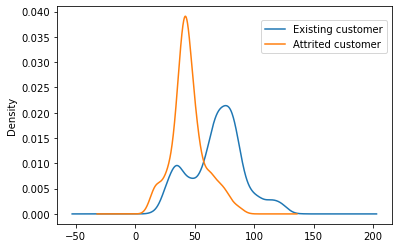

In [34]:
fig = plt.figure()

exist['Total_Trans_Ct'].plot.density(label='Existing customer')
attrited['Total_Trans_Ct'].plot.density(label='Attrited customer')
fig.legend(loc='upper right', bbox_to_anchor=(0.4, 0.35, 0.5, 0.5))

#### Customer_Age
The ages of existing and attrited customers are simillarly distributed

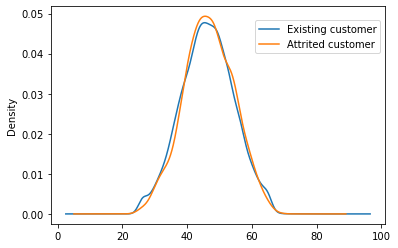

In [35]:
fig = plt.figure()

exist['Customer_Age'].plot.density(label='Existing customer')
attrited['Customer_Age'].plot.density(label='Attrited customer')
fig.legend(loc='upper right', bbox_to_anchor=(0.4, 0.35, 0.5, 0.5))

# sns.kdeplot(data=df1, x='Customer_Age')
# sns.kdeplot(data=df2, x='Customer_Age')

#### Dependent_count
The number of dependents depended on the attrited and existing customers are similar.

In [36]:
# Dependent_count
# make a table for the plot
dep_table = pd.crosstab(data['Dependent_count'], data['Attrition_Flag'])
dep_perc = dep_table.div(dep_table.sum(0), axis=1)
dep_perc

# dep_table = pd.crosstab(df['Attrition_Flag'], df['Dependent_count'])
# dep_perc = dep_table.div(dep_table.sum(1), axis=0)
# dep_perc

Attrition_Flag,Attrited Customer,Existing Customer
Dependent_count,,
0,0.082975,0.090471
1,0.165335,0.184588
2,0.256300,0.263294
3,0.296251,0.264706
4,0.159803,0.154588
5,0.039336,0.042353


<AxesSubplot:xlabel='Dependent_count'>

<Figure size 432x288 with 0 Axes>

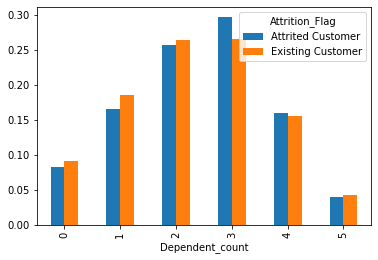

In [37]:
fig = plt.figure()
dep_perc.plot.bar()

#### Total_Relationship_Count
The existing customer have more benk products compared to attrited one.


<AxesSubplot:xlabel='Total_Relationship_Count'>

<Figure size 432x288 with 0 Axes>

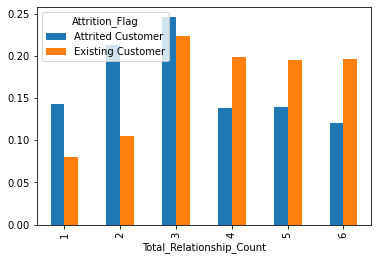

In [38]:
rel_table = pd.crosstab(data['Total_Relationship_Count'], data['Attrition_Flag'])
rel_perc = rel_table.div(rel_table.sum(0), axis=1)

fig = plt.figure()
rel_perc.plot.bar()

#### Months_on_book
The time existing and sttrited customers have been the customers of this bank is roughly same.

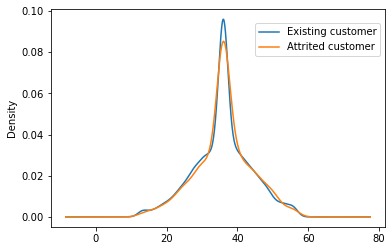

In [39]:
fig = plt.figure()

exist['Months_on_book'].plot.density(label='Existing customer')
attrited['Months_on_book'].plot.density(label='Attrited customer')
fig.legend(loc='upper right', bbox_to_anchor=(0.4, 0.35, 0.5, 0.5))

### Conclusion

From the above plots, we can tell that the total transaction count of attrited and existing customers are quite different.

Therefore, we further look into the relationship between Total_Trans_Ct and other factors.

### The relationship between Total_Trans_Ct and other factors

#### Total_Trans_Ct and Dependent_count
A customer has higher total transaction count no matter how many dependents depended on him or her.


<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Dependent_count'>

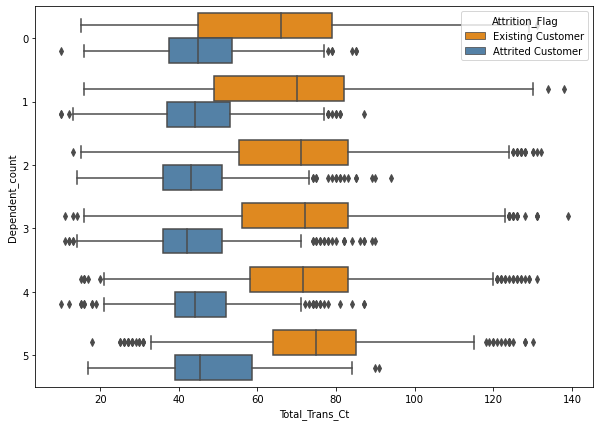

In [40]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data=data, x="Total_Trans_Ct", y="Dependent_count", hue="Attrition_Flag", 
            orient='h', palette=['darkorange','steelblue'])

#### Total_Trans_Ct and Total_Relationship_Count
A customer has higher total transaction count no matter how many bank products he or she has.

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Total_Relationship_Count'>

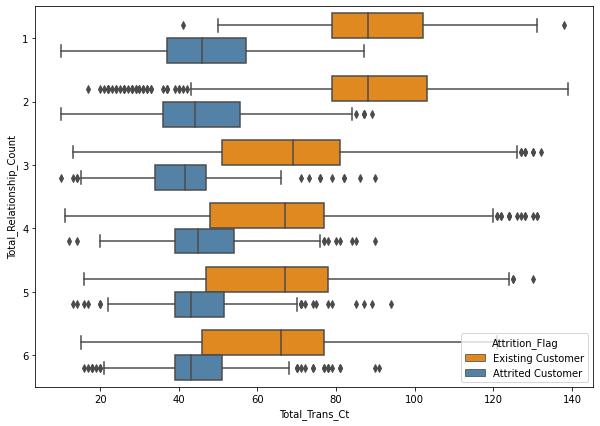

In [41]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data=data, x="Total_Trans_Ct", y="Total_Relationship_Count", hue="Attrition_Flag", 
            orient='h', palette=['darkorange','steelblue'])

#### Total_Trans_Ct and Customer_Age
Customer age has nothing to do with total transaction count.

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Customer_Age'>

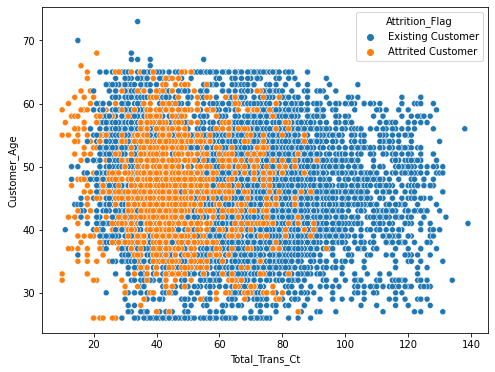

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=data, x="Total_Trans_Ct", y="Customer_Age", hue="Attrition_Flag")

#### Months_on_book
How long has a person been the customer of the bank has nothing to do with total transaction count.

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Months_on_book'>

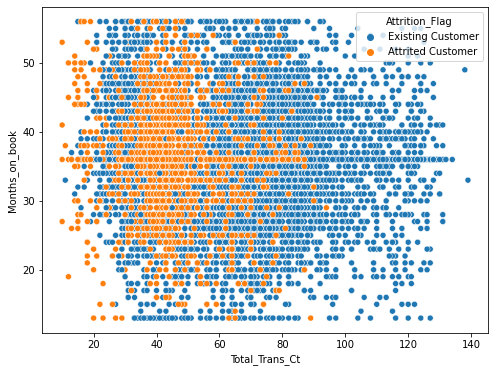

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=data, x="Total_Trans_Ct", y="Months_on_book", hue="Attrition_Flag")

## Model:
The model we choose is **GaussianNB**, whose complete name is Gaussian Naive Bayes. 
For general idea, naive Bayes is a probabilistic machine learning algorithm used for many **classification functions** and is based on the Bayes theorem. 
It assumes all the features are **independent to each other**. 
Gaussian Naive Bayes is specifically used when the features have **continuous values**. 
It’s also assumed that all the features are following a **gaussian distribution**.

In order to predict the value of **Attrition_Flag**, we'll feed 5 factors, 
which are **Customer_Age, Dependent_count, Total_Trans_Ct, Total_Repationship_Count, Months_on_book** into our model.

The above five features are more like normal distribution compared to other columns in the Bankchurners.
However, before feeding the model, let's adjust the features to make them look better.

In [44]:
# Definite a function called "normality" to draw the KDE plot and the Quantile-Quantile plot

def normality(data, feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])  # draw the KDE
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)  # draw the Q-Q plot
    plt.tight_layout()
    plt.show()

### The steps to make the data in each column more like a normal distribution
1. We have to check if there is any value equal to 0. It will affect which transformation method we can apply.
2. Apply the transformation method to the data. And assign the data to a new column.
3. Drow the graphic of the result from each transformation method.
4. Compare every graphic. And choose which one has the KDE that is the closest to the center and the Q-Q plot that is the smoothest and the closest to the red line.
5. Draw the histogram and the KDE of the original one with brown and the transformed one with black. It will be more obvious to see the difference.



### Total_Trans_Ct


#### Step 1
We will check if there are any 0 in the data, otherwise it will affect the result.   

*There isn't any row having 0 in column 'Total_Trans_Ct', so we can use every transformation method.*

In [45]:
data[data['Total_Trans_Ct'] == 0].head()

,Attrition_Flag,Total_Trans_Ct,Customer_Age,Dependent_count,Total_Relationship_Count,Months_on_book


#### Step 2
Use five transformation methods for our next step to compare.

#### Step 3
Draw the picture using the five methods we just mentioned.  
The left plot is the kernel density estimate, and the right plot is the Normal Q_Q plot.  
In the the closer to the red line it is, the more like a normal distribution it is.

#### Step 4
Compare the graphics and choose the best one.

*We can get that the plot made by Square Root Transformation seems to be the most consistent with the normal distribution.*  
*Its KDE is the closest to the center and its Q-Q plot is the smoothest.*   

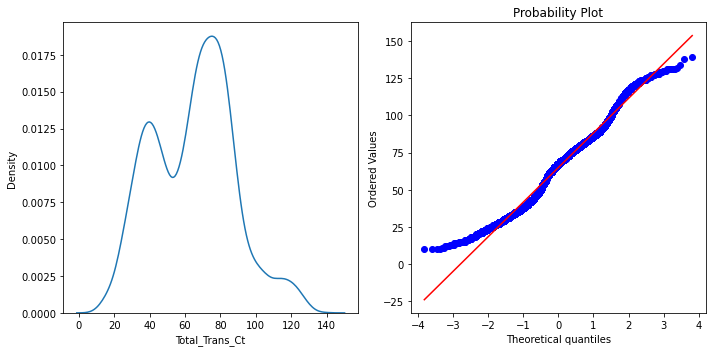

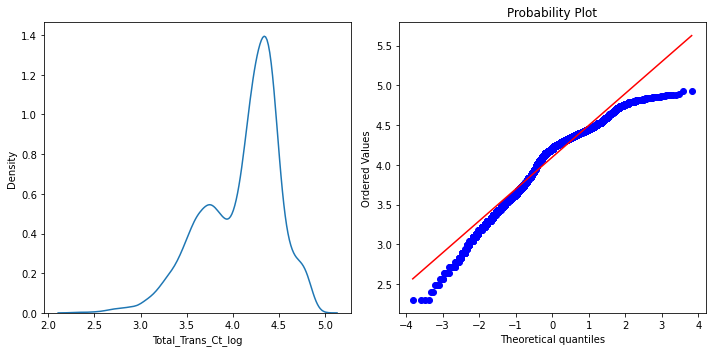

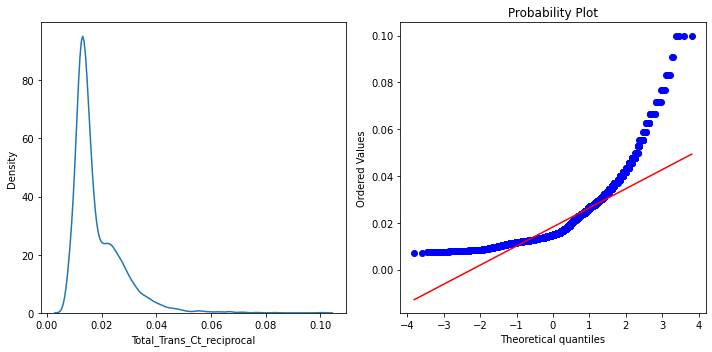

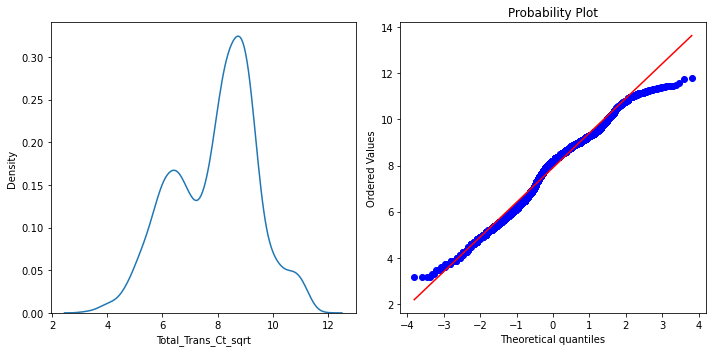

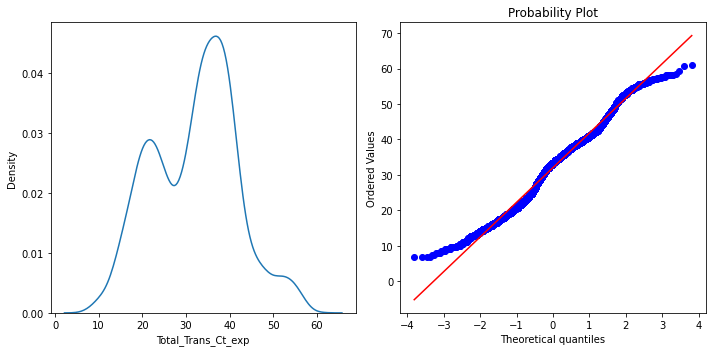

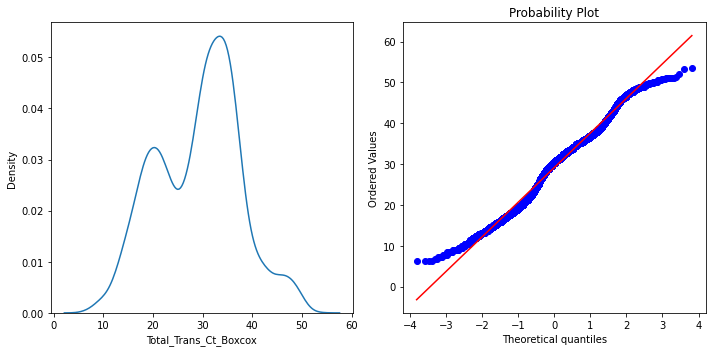

In [46]:
# Step2

data['Total_Trans_Ct_log'] = np.log(data['Total_Trans_Ct'])
data['Total_Trans_Ct_reciprocal'] = 1/ data['Total_Trans_Ct']
data['Total_Trans_Ct_sqrt'] = np.sqrt(data['Total_Trans_Ct'])
data['Total_Trans_Ct_exp'] = data['Total_Trans_Ct']**(1/1.2)
data['Total_Trans_Ct_Boxcox'],parameters=stats.boxcox(data['Total_Trans_Ct'])

# Step3

normality(data, 'Total_Trans_Ct')
normality(data, 'Total_Trans_Ct_log')
normality(data, 'Total_Trans_Ct_reciprocal')
normality(data, 'Total_Trans_Ct_sqrt')
normality(data, 'Total_Trans_Ct_exp')
normality(data, 'Total_Trans_Ct_Boxcox')

# Step4

#### Step 5
Compare the original model with the transformed one.  

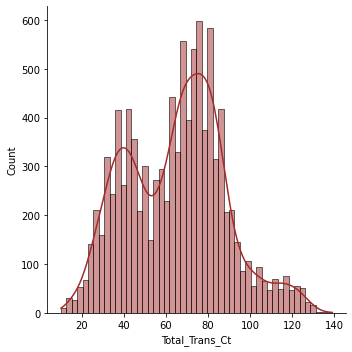

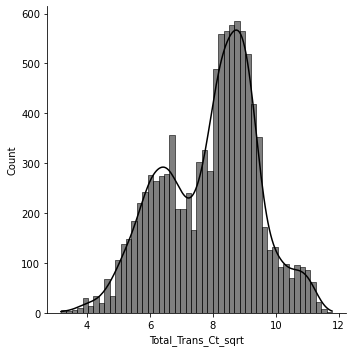

In [12]:
# Step5

# original Total_Trans_Ct
sns.displot(data['Total_Trans_Ct'], bins=50, color='brown', kde=True)
# Total_Trans_Ct after np.sqrt()
sns.displot(data['Total_Trans_Ct_sqrt'], bins=50, color='black', kde=True)

# The transformation method reduces the skewness.

## Customer_Age

#### Step 1
We will check if there are any 0 in the data, otherwise it will affect the result.   

*There isn't any row having 0 in column 'Customer_Age', so we can use every transformation method.*

In [47]:
# Step1

data[data['Customer_Age'] == 0].head()

,Attrition_Flag,Total_Trans_Ct,Customer_Age,Dependent_count,Total_Relationship_Count,Months_on_book,Total_Trans_Ct_log,Total_Trans_Ct_reciprocal,Total_Trans_Ct_sqrt,Total_Trans_Ct_exp,Total_Trans_Ct_Boxcox


#### Step 2
Use five transformation methods for our next step to compare.

#### Step 3
Draw the picture using the five methods we just mentioned.  
The left plot is the kernel density estimate, and the right plot is the Normal Q_Q plot.  
In the the closer to the red line it is, the more like a normal distribution it is.

#### Step 4
Compare the graphics and choose the best one.

*We can get that the plot made by Square Root Transformation seems to be the most consistent with the normal distribution.*  
*Its KDE is the closest to the center and its Q-Q plot is the smoothest.*   

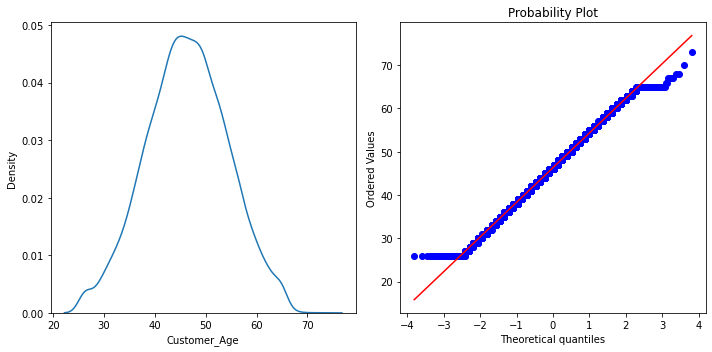

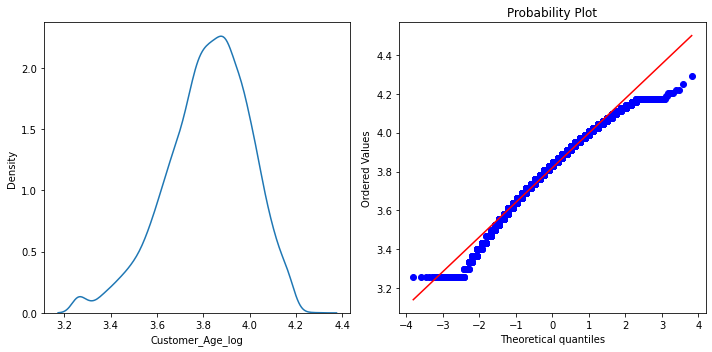

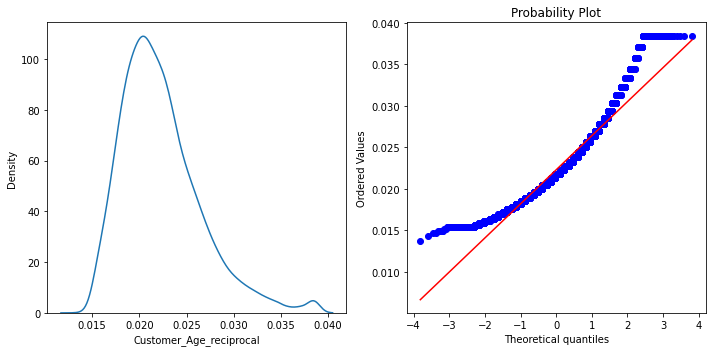

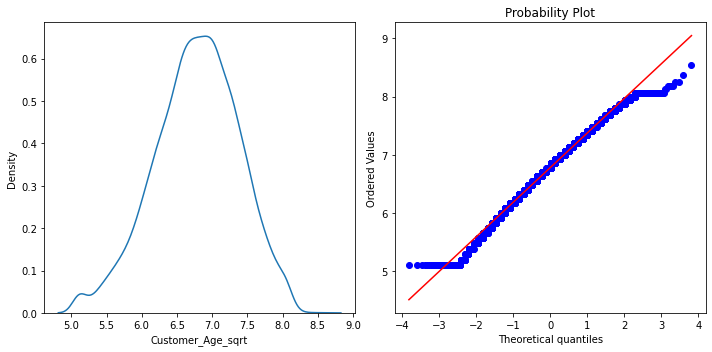

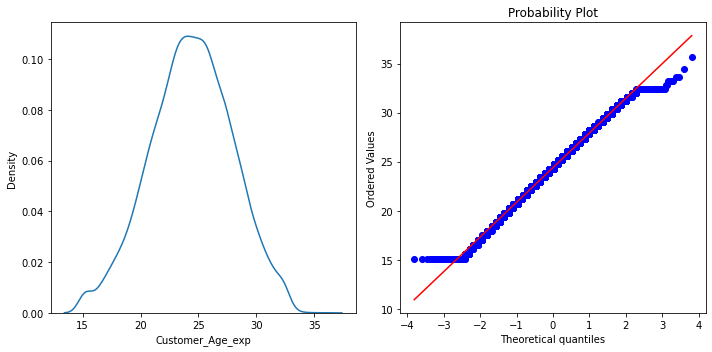

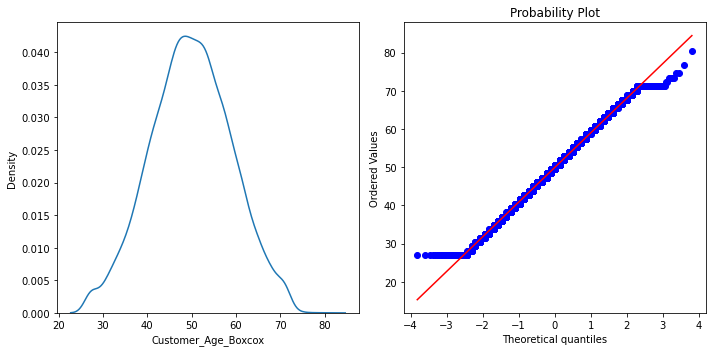

In [48]:
# Step2

data['Customer_Age_log'] = np.log(data['Customer_Age'])
data['Customer_Age_reciprocal'] = 1/ data['Customer_Age']
data['Customer_Age_sqrt'] = np.sqrt(data['Customer_Age'])
data['Customer_Age_exp'] = data['Customer_Age']**(1/1.2)
data['Customer_Age_Boxcox'],parameters=stats.boxcox(data['Customer_Age'])

# Step3

normality(data, 'Customer_Age')
normality(data, 'Customer_Age_log')
normality(data, 'Customer_Age_reciprocal')
normality(data, 'Customer_Age_sqrt') # the best one
normality(data, 'Customer_Age_exp')
normality(data, 'Customer_Age_Boxcox')

# Step4

#### Step 5
Compare the original model with the transformed one.  

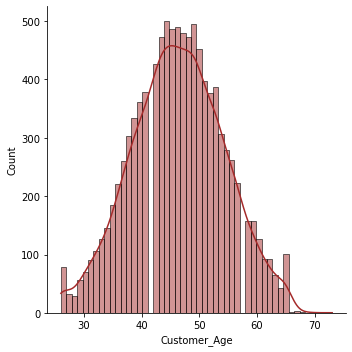

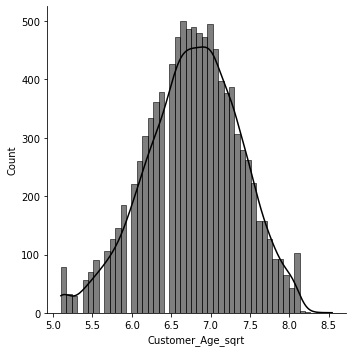

In [15]:
# Step5

# Original Customer_age
sns.displot(data['Customer_Age'], bins=50, color='brown', kde=True)
# Customer_age after np.sqrt()
sns.displot(data['Customer_Age_sqrt'], bins=50, color='black', kde=True)

# The transformation method reduces the skewness

## Dependent_count

#### Step 1
We will check if there are any 0 in the data, otherwise it will affect the result.

There are rows having 0 in column 'Dependent_count'.  
So it's not suitable for transforming by log, sqrt, reciprocal, and boxcox.

In [49]:
# Step1

data[data['Dependent_count'] == 0].head()

,Attrition_Flag,Total_Trans_Ct,Customer_Age,Dependent_count,Total_Relationship_Count,Months_on_book,Total_Trans_Ct_log,Total_Trans_Ct_reciprocal,Total_Trans_Ct_sqrt,Total_Trans_Ct_exp,Total_Trans_Ct_Boxcox,Customer_Age_log,Customer_Age_reciprocal,Customer_Age_sqrt,Customer_Age_exp,Customer_Age_Boxcox
7,Existing Customer,36,32,0,2,27,3.583519,0.027778,6.000000,19.811563,18.466501,3.465736,0.031250,5.656854,17.959393,33.728821
21,Attrited Customer,16,62,0,2,49,2.772589,0.062500,4.000000,10.079368,9.409363,4.127134,0.016129,7.874008,31.164470,67.723108
34,Existing Customer,24,58,0,6,49,3.178054,0.041667,4.898979,14.131102,13.250660,4.060443,0.017241,7.615773,29.479718,63.151802
39,Attrited Customer,16,66,0,5,56,2.772589,0.062500,4.000000,10.079368,9.409363,4.189655,0.015152,8.124038,32.831189,72.304047
52,Existing Customer,38,66,0,3,54,3.637586,0.026316,6.164414,20.724608,19.290494,4.189655,0.015152,8.124038,32.831189,72.304047


#### Step 2
Use exponential transformation method for our next step to compare.

#### Step 3
Draw the picture using the five methods we just mentioned.  
The left plot is the kernel density estimate, and the right plot is the Normal Q_Q plot.  
In the the closer to the red line it is, the more like a normal distribution it is.

#### Step 4
Compare the graphics and choose the best one.

*We can get that the original plot seems to be the most consistent with the normal distribution.*

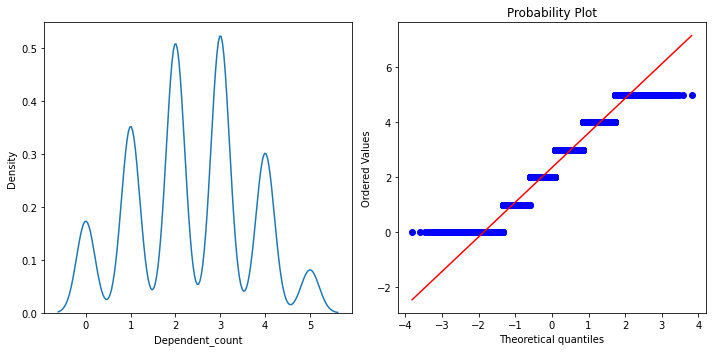

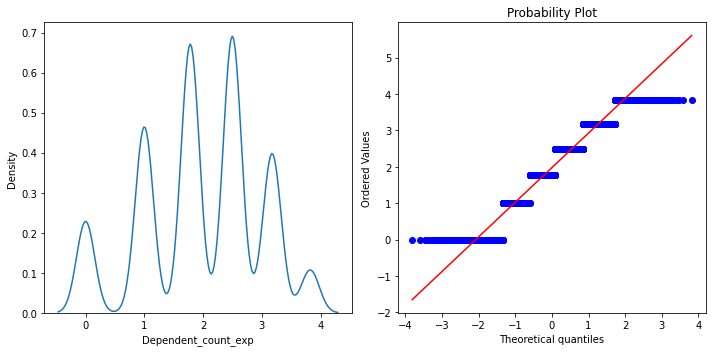

In [50]:
# Step2

data['Dependent_count_exp'] = data['Dependent_count']**(1/1.2)

# Step3

normality(data, 'Dependent_count')
normality(data, 'Dependent_count_exp')

# Step4

#### Step 5
Compare the original model with the transformed one.  

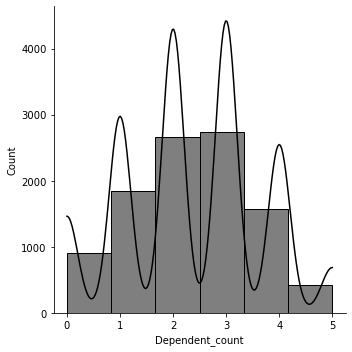

In [51]:
# Step5

# Orgianl Dependent_count
sns.displot(data['Dependent_count'], bins=6, color='black', kde=True)

## Total_Relationship_Count

#### Step 1
We will check if there are any 0 in the data, otherwise it will affect the result.   

*There isn't any row having 0 in column 'Total_Relaionship_Count', so we can use every transformation method.*

In [53]:
# Step1

data[data['Total_Relationship_Count'] == 0].head()

,Attrition_Flag,Total_Trans_Ct,Customer_Age,Dependent_count,Total_Relationship_Count,Months_on_book,Total_Trans_Ct_log,Total_Trans_Ct_reciprocal,Total_Trans_Ct_sqrt,Total_Trans_Ct_exp,Total_Trans_Ct_Boxcox,Customer_Age_log,Customer_Age_reciprocal,Customer_Age_sqrt,Customer_Age_exp,Customer_Age_Boxcox,Dependent_count_exp


#### Step 2
Use five transformation methods for our next step to compare.

#### Step 3
Draw the picture using the five methods we just mentioned.  
The left plot is the kernel density estimate, and the right plot is the Normal Q_Q plot.  
In the the closer to the red line it is, the more like a normal distribution it is.

#### Step 4
Compare the graphics and choose the best one.

*We can get that the original plot seems to be the most consistent with the normal distribution.*   
*Its KDE is the closest to the center and its Q-Q plot is the smoothest.* 

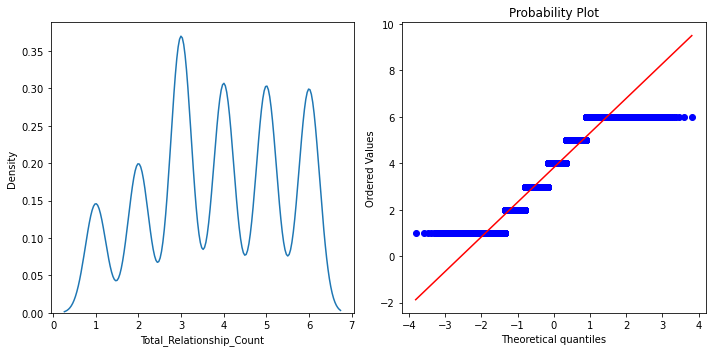

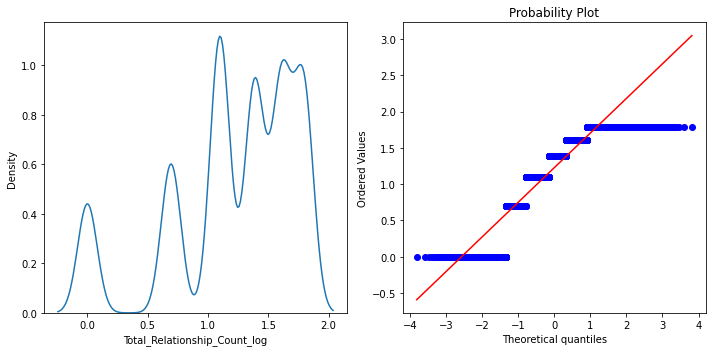

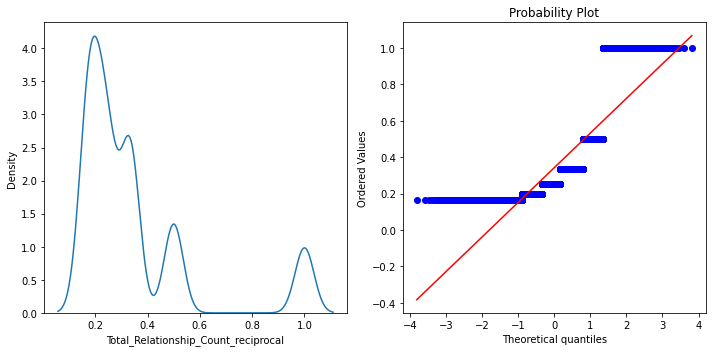

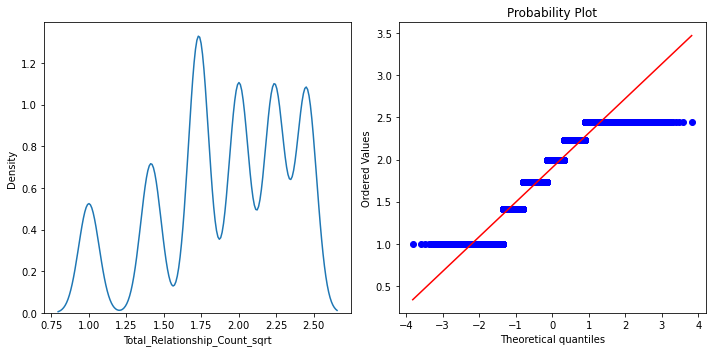

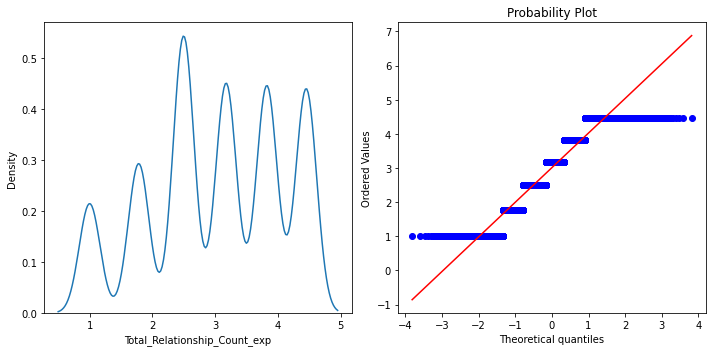

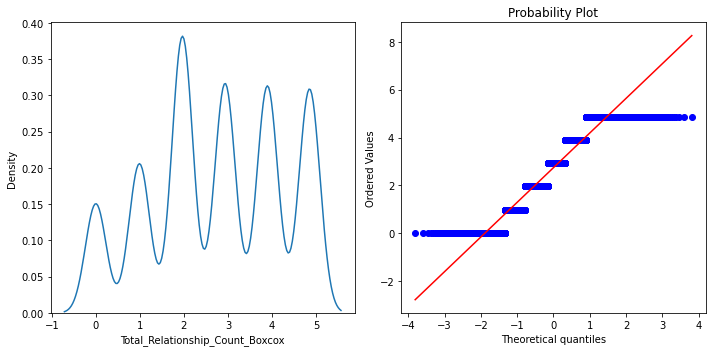

In [54]:
# Step2

data['Total_Relationship_Count_log'] = np.log(data['Total_Relationship_Count'])
data['Total_Relationship_Count_reciprocal'] = 1/ data['Total_Relationship_Count']
data['Total_Relationship_Count_sqrt'] = np.sqrt(data['Total_Relationship_Count'])
data['Total_Relationship_Count_exp'] = data['Total_Relationship_Count']**(1/1.2)
data['Total_Relationship_Count_Boxcox'],parameters=stats.boxcox(data['Total_Relationship_Count'])

# Step3
normality(data, 'Total_Relationship_Count')
normality(data, 'Total_Relationship_Count_log')
normality(data, 'Total_Relationship_Count_reciprocal')
normality(data, 'Total_Relationship_Count_sqrt')
normality(data, 'Total_Relationship_Count_exp')
normality(data, 'Total_Relationship_Count_Boxcox')

# Step4

#### Step 5
Compare the original model with the transformed one.  

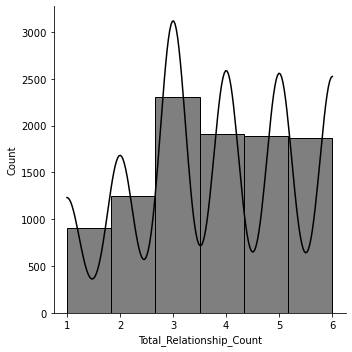

In [21]:
# Step5

# Original Total_Relationship_count
sns.displot(data['Total_Relationship_Count'], bins=6, color='black', kde=True)

## Months_on_book

#### Step 1
We will check if there are any 0 in the data, otherwise it will affect the result.   

*There isn't any row having 0 in column 'Months_on_book', so we can use every transformation method.*

In [57]:
# Step1

data[data['Months_on_book'] == 0].head()

,Attrition_Flag,Total_Trans_Ct,Customer_Age,Dependent_count,Total_Relationship_Count,Months_on_book,Total_Trans_Ct_log,Total_Trans_Ct_reciprocal,Total_Trans_Ct_sqrt,Total_Trans_Ct_exp,...,Customer_Age_reciprocal,Customer_Age_sqrt,Customer_Age_exp,Customer_Age_Boxcox,Dependent_count_exp,Total_Relationship_Count_log,Total_Relationship_Count_reciprocal,Total_Relationship_Count_sqrt,Total_Relationship_Count_exp,Total_Relationship_Count_Boxcox


#### Step 2
Use five transformation methods for our next step to compare.

#### Step 3
Draw the picture using the five methods we just mentioned.  
The left plot is the kernel density estimate, and the right plot is the Normal Q_Q plot.  
In the the closer to the red line it is, the more like a normal distribution it is.

#### Step 4
Compare the graphics and choose the best one.

*We can get that the plot made by Box-cox transformation seems to be the most consistent with the normal distribution.*  
*Its KDE is the closest to the center and its Q-Q plot is the smoothest.*   

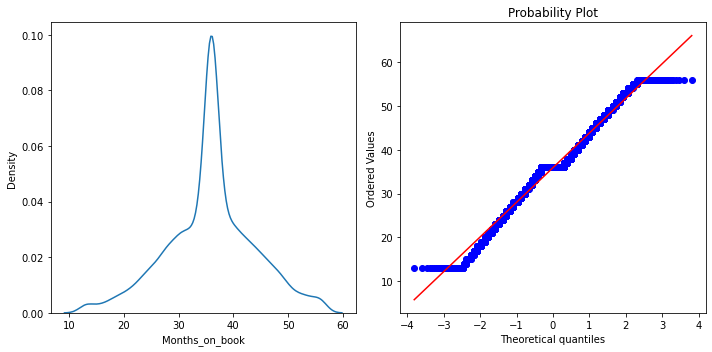

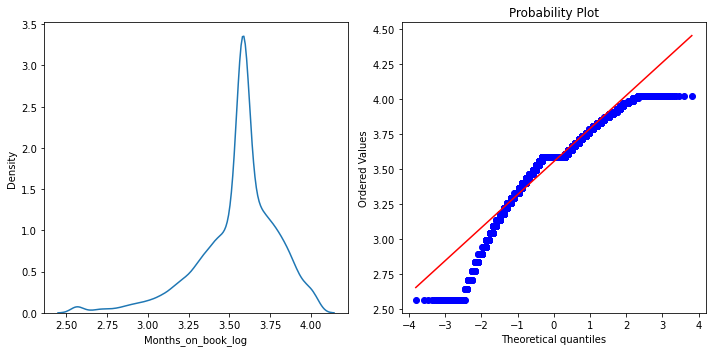

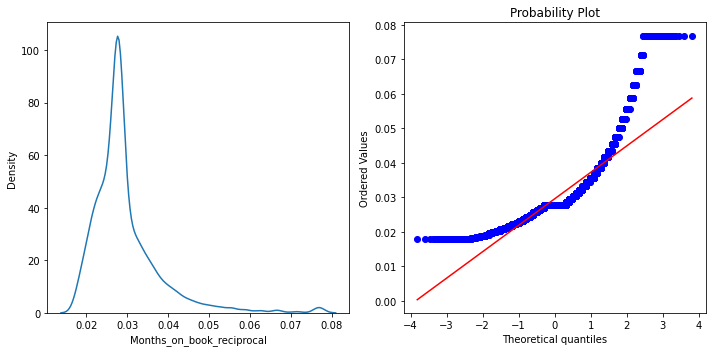

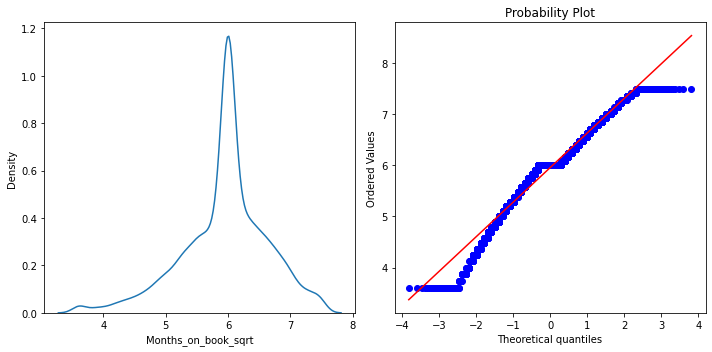

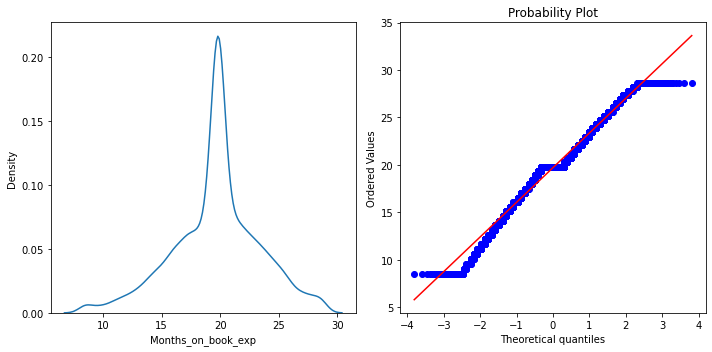

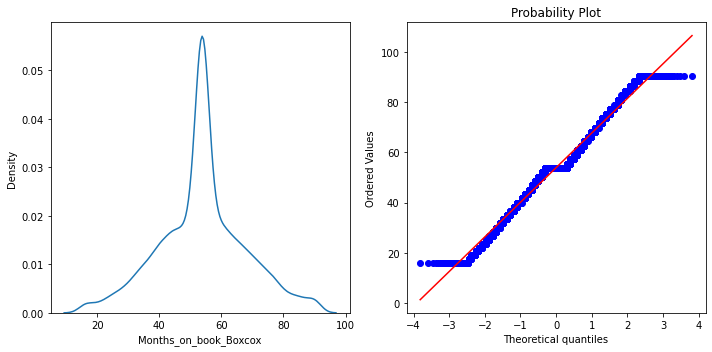

In [58]:
# Step2

data['Months_on_book_log'] = np.log(data['Months_on_book'])
data['Months_on_book_reciprocal'] = 1/ data['Months_on_book']
data['Months_on_book_sqrt'] = np.sqrt(data['Months_on_book'])
data['Months_on_book_exp'] = data['Months_on_book']**(1/1.2)
data['Months_on_book_Boxcox'],parameters=stats.boxcox(data['Months_on_book'])

# Step3

normality(data, 'Months_on_book')
normality(data, 'Months_on_book_log')
normality(data, 'Months_on_book_reciprocal')
normality(data, 'Months_on_book_sqrt')
normality(data, 'Months_on_book_exp')
normality(data, 'Months_on_book_Boxcox')

# Step4

#### Step 5
Compare the original model with the transformed one.  

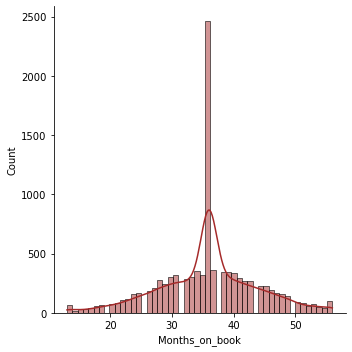

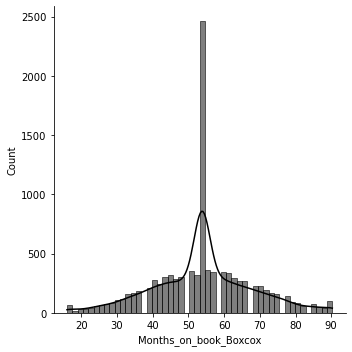

In [59]:
# Step5

# Original Months_on_book
sns.displot(data['Months_on_book'], bins=50, color='brown', kde=True)
# Months_on_book after Boxcox transformation
sns.displot(data['Months_on_book_Boxcox'], bins=50, color='black', kde=True)

# The Box-cox transformation method reduces the skewness.

# Model
## classification: Attrition_Flag
Our target is to use the **classification** to predict the column **Attrition_Flag**.

The target variable is

    Attrition_Flag

The fetures are

1. Total_Trans_Ct_sqrt : Total_Trans_Ct after being transformed by the square root tranformation method.
2. Customer_Age_sqrt : Customer_Age after being tranformed by the square root tranformation method.
3. Dependent_count : the original Dependent_count
4. Total_Relationship_Count : the original Total_Relationship_Count
5. Months_on_book_Boxcox : Months_on_book after being transformed by the box-cox tranformation method.

In [25]:
# import the model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# initiate the model
model = GaussianNB()

In [26]:
# The features we use are below:
X = data[['Total_Trans_Ct_sqrt', 'Customer_Age_sqrt', 'Dependent_count', 'Total_Relationship_Count', 'Months_on_book_Boxcox']]
print(X.shape)
type(X)

(10127, 5)


pandas.core.frame.DataFrame

In [27]:
# extract the target variable
y = data['Attrition_Flag']
print(y.shape)
type(y)

(10127,)


pandas.core.series.Series

## Split the data into train and test with different propotion
We will use different values of test_size and choose the one with the best accuracy score.

### Default test_size : 0.25

In [43]:
# Split the data into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [44]:
# the proportion of test and train dataset is 1:3
print(len(ytest), len(ytrain))

2532 7595


In [45]:
# fit the model
model.fit(Xtrain, ytrain)

# use test data to predict the new data
y_model = model.predict(Xtest)

In [46]:
# evaluate the model
test_size_25 = accuracy_score(ytest, y_model)
test_size_25

0.8546603475513428

### test_size : 0.15

In [47]:
# Split the data into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15 ,random_state=1)

In [48]:
# the proportion of test and train dataset is 1:3
print(len(ytest), len(ytrain))

1520 8607


In [49]:
# fit the model
model.fit(Xtrain, ytrain)

# use test data to predict the new data
y_model = model.predict(Xtest)

In [50]:
# evaluate the model
test_size_15 = accuracy_score(ytest, y_model)
test_size_15

0.8519736842105263

### test_size : 0.35

In [51]:
# Split the data into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.35 ,random_state=1)

In [52]:
# the proportion of test and train dataset is 1:3
print(len(ytest), len(ytrain))

3545 6582


In [53]:
# fit the model
model.fit(Xtrain, ytrain)

# use test data to predict the new data
y_model = model.predict(Xtest)

In [54]:
# evaluate the model
test_size_35 = accuracy_score(ytest, y_model)
test_size_35

0.8535966149506347

### Compare the scores

In [57]:
print("test_size = 0.25 :", test_size_25)
print("test_size = 0.15 :", test_size_15)
print("test_size = 0.35 :", test_size_35)

test_size = 0.25 : 0.8546603475513428
test_size = 0.15 : 0.8519736842105263
test_size = 0.35 : 0.8535966149506347


Which has the best score is **test_size = 0.25** with a score of about **0.8546**.

# Conclusion  
When the target variable of our model is Attrition_Flag and the features used for prediction in the process are the five parameters that have been screened, test_size = 0.25 will get the highest accuracy.


*When test_size = 0.15, the accuracy decreases, and we guess the possible reason is the overfitting problem.*    
*When test_size = 0.35, the accuracy decreases, we think it is because the model training is not accurate enough.*   

***test_size = 0.25, which is just in the middle value, becomes our best result.***